In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, UpSampling2D

In [10]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [11]:
x_train, x_test = x_train/255, x_test/255

In [12]:
x_train.shape

(60000, 28, 28)

In [4]:
input_img = Input(shape=(28,28,1))

# Encoder / DownSampling
x = Conv2D(32, (3,3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(32, (3,3), activation="relu", padding="same")(x)
encoded = MaxPooling2D((2,2), padding="same")(x)

In [6]:
x = Conv2D(32, (3,3), activation="relu", padding="same")(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3,3), activation="relu", padding="same")(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation="sigmoid", padding="same")(x)

In [7]:
model = Model(input_img, decoded)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 32)          9248  

In [13]:
x_train = np.reshape(x_train, (x_train.shape[0], 28,28,1))
x_test = np.reshape(x_test, (x_test.shape[0], 28,28,1))

In [14]:
x_train.shape

(60000, 28, 28, 1)

In [26]:
noise_threshold = 0.3
x_train_noisy = x_train + noise_threshold * np.random.normal(size=x_train.shape)
x_test_noisy = x_test + noise_threshold * np.random.normal(size=x_test.shape)

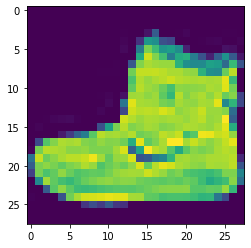

In [27]:
plt.imshow(x_train[0])

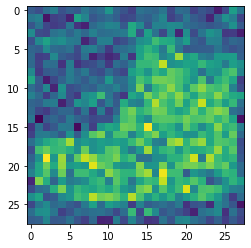

In [28]:
plt.imshow(x_train_noisy[0])

In [32]:
x_train_noisy[0][0][:5]

array([[-0.0916491 ],
       [-0.20051918],
       [ 0.07012612],
       [ 0.2553806 ],
       [-0.17915574]])

In [33]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

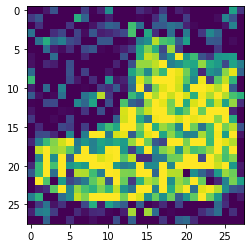

In [34]:
plt.imshow(x_train_noisy[0])

In [35]:
x_train_noisy[0][0][:5]

array([[0.        ],
       [0.        ],
       [0.07012612],
       [0.2553806 ],
       [0.        ]])

In [36]:
model.compile(optimizer="adam", loss="binary_crossentropy")
model.fit(x_train_noisy, x_train, epochs=5, validation_data=(x_test_noisy, x_test))

Epoch 1/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.2948 - val_loss: 0.2835
Epoch 2/5
1875/1875 [==============================] - 74s 40ms/step - loss: 0.2787 - val_loss: 0.2784
Epoch 3/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2750 - val_loss: 0.2760
Epoch 4/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2733 - val_loss: 0.2746
Epoch 5/5
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2724 - val_loss: 0.2751


In [40]:
decoded_images = model.predict(x_test_noisy)

313/313 [==============================] - 3s 9ms/step


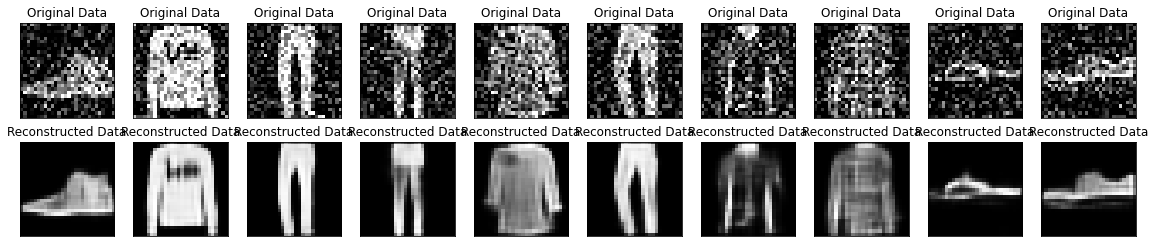

In [41]:
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.title("Original Data")
    plt.imshow(x_test_noisy[i])
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.title("Reconstructed Data")
    plt.imshow(decoded_images[i])
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()